## Summary

- This file is just a script to produce the assets of Lecture08.

In [5]:
# import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def f(x1,x2):
    return (x1**2 + x2 -11)**2 + (x1 + x2**2 -7)**2 + 1e-10

In [15]:
L = 5
x = np.linspace(-L, L, 501).reshape(1, -1)
y = np.linspace(-L, L, 501).reshape(-1, 1)
X, Y = np.meshgrid(x,y)
Z = f(X, Y)

lrs = [1e-1, 1e-2, 1e-3, 1e-4]

sgd, mom, adam = [], [], []

for lr in lrs:
    sgd.append(np.load("./data/sgd{:0.4f}.npy".format(lr)))
    mom.append(np.load("./data/mom{:0.4f}.npy".format(lr)))
    adam.append(np.load("./data/adam{:0.4f}.npy".format(lr)))

adam = np.array(adam)
mom = np.array(mom)
sgd = np.array(sgd)

result = np.stack([sgd, mom, adam], axis=-1)
result.shape

(4, 31, 2, 3)

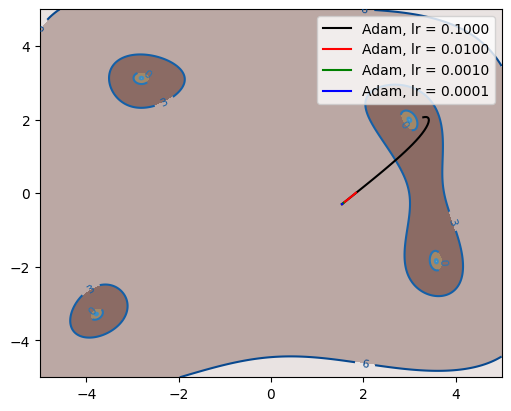

In [37]:
fig = plt.figure(figsize=(5, 4), dpi=100, facecolor="w", layout="constrained")

ax2 = fig.add_subplot(111)
im1 = ax2.contourf(X,Y,np.log(Z), cmap=mpl.cm.terrain, levels=10, extent=[-L, L, -L, L])
im2 = ax2.contour(X,Y,np.log(Z), cmap=mpl.cm.Blues, levels=10, extent=[-L, L, -L, L])

ax2.clabel(im2, inline=True, fontsize=8)

colors = ["k", "r", "g", "b"]

for i in range(4):
    ax2.plot(result[i,:,0,2], result[i,:,1,2], colors[i], label="Adam, lr = {:0.4f}".format(lrs[i]))

ax2.set(xlim=[-L,L], ylim=[-L,L])
ax2.legend(loc="best")

plt.savefig("./data/fig_Adam.png")
plt.show()



In [48]:
labels = ["SGD", "Momentum", "Adam"]

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softplus(x):
    return np.log(1+np.exp(x))

def relu(x):
    output = []
    for idx, element in enumerate(x):
        output.append(max(0,element))
    return np.array(output)

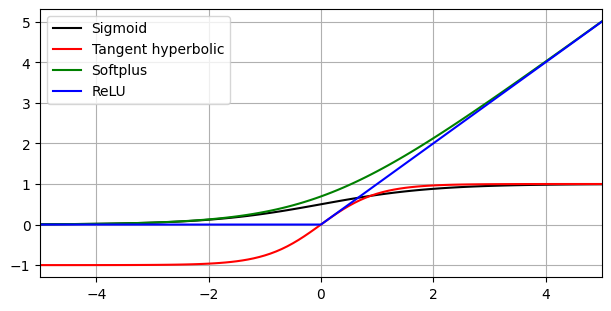

In [52]:
x = np.linspace(-L, L, 101)

fig = plt.figure(figsize=(6, 3), dpi=100, facecolor="w", layout="constrained")

ax1 = fig.add_subplot(111)

ax1.plot(x, sigmoid(x), 'k', label="Sigmoid")
ax1.plot(x, np.tanh(x), 'r', label="Tangent hyperbolic")
ax1.plot(x, softplus(x), 'g', label="Softplus")
ax1.plot(x, relu(x), 'b', label="ReLU")

ax1.set(xlim=[-L,L])
ax1.grid(True)
ax1.legend(loc="best")

plt.savefig("./data/fig_actFuncs.png")
plt.show()

In [ ]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def softplus_der(x):
    return sigmoid(x)

def relu(x):
    output = []
    for idx, element in enumerate(x):
        if element > 0: output.append(1)
        else: output.append(0)
    return np.array(output)

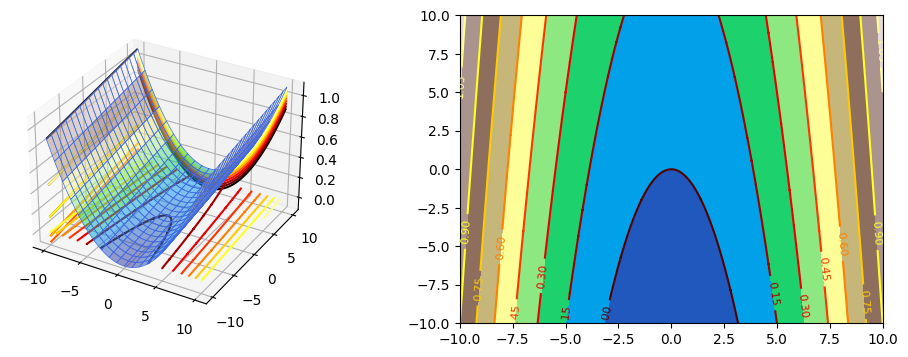

In [96]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121, projection="3d")
im1 = ax1.plot_surface(X, Y, Z, cmap=mpl.cm.terrain, edgecolor='royalblue', lw=0.5, rstride=25, cstride=25, alpha=0.5)
ax1.contour(X, Y, Z, zdir='z', offset=0, cmap=mpl.cm.hot)
ax1.contour(X, Y, Z, zdir='x', offset=-L, cmap=mpl.cm.hot)
ax1.contour(X, Y, Z, zdir='y', offset=L, cmap=mpl.cm.hot)

ax2 = fig.add_subplot(122)
im1 = ax2.contourf(X,Y,Z, cmap=mpl.cm.terrain, levels=10, extent=[-5, 5, -5, 5])
im2 = ax2.contour(X,Y,Z, cmap=mpl.cm.hot, levels=10, extent=[-5, 5, -5, 5])
ax2.clabel(im2, inline=True, fontsize=8)

plt.show()